# *In situ* data

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import Image
from IPython.display import display

print('All libraries successfully imported!')
print(f'Pandas    : {pd.__version__}')
print(f'GeoPandas : {gpd.__version__}')

All libraries successfully imported!
Pandas    : 1.1.5
GeoPandas : 0.9.0


## Set directory

In [36]:
computer_path = '/export/miro/ndeffense/LBRAT2104/'
grp_letter    = 'X'

data_path = f'{computer_path}data/IN_SITU_NAMUR/'
lut_path  = f'{computer_path}data/LUT/'

# Directory for all work files
work_path = f'{computer_path}GROUP_{grp_letter}/WORK/'

roi_path     = f'{work_path}ROI/'
in_situ_path = f'{work_path}IN_SITU/'

Path(in_situ_path).mkdir(parents=True, exist_ok=True)

## Reading shapefile

With `GeoPandas` we can read a shapefile in a GeoDataFrame and apply many methods on it.
- **GeoSeries** : a vector where each entry in the vector is a set of shapes corresponding to one observation.
- **GeoDataFrame** : a tabular data structure that contains a GeoSeries column that holds a special status. This GeoSeries is referred to as the GeoDataFrame’s “geometry”. When a spatial method is applied to a GeoDataFrame (or a spatial attribute like 'area' is called), this commands will always act on the “geometry” column. A GeoDataFrame is equivalent to the Attribute Table in QGIS + a geometry column (which is hidden in QGIS).


`GeoPandas` has three basic classes of geometric objects (which are actually `shapely` objects):
- Points / Multi-Points
- Lines / Multi-Lines
- Polygons / Multi-Polygons

We will open two shapefiles :
+ cropland in Namur - SIGEC dataset (2020)
+ non-cropland in Namur - homemade dataset

In [38]:
crop_name     = 'NAMUR_2020_CROPLAND.shp'
non_crop_name = 'NAMUR_2020_NON_CROPLAND.shp'


crop_file     = f'{data_path}{crop_name}'
non_crop_file = f'{data_path}{non_crop_name}'

# Read a vector using GeoPandas (gpd) into the GeoDataFrame "gdf"
crop_gdf     = gpd.read_file(crop_file)
non_crop_gdf = gpd.read_file(non_crop_file)

# Display the 5 first rows of the GeoDataFrame
print(f'There are {len(crop_gdf)} cropland polygons in the shapefile.')
display(crop_gdf.head())

print(f'There are {len(non_crop_file)} non-cropland polygons in the shapefile.')
display(non_crop_gdf.head())

# Get the Coordinates Reference System (CRS)
print(f'\n The Coordinates Reference System is {crop_gdf.crs} (crop) and {non_crop_gdf.crs} (non-crop)')

There are 655 cropland polygons in the shapefile.


,OBJECTID,CAMPAGNE,CULT_COD,CULT_NOM,GROUPE_CUL,SURF_HA,geometry
0,167.0,2020,6,Prairie et fourrage,Production fourrag?re,0.2524,"POLYGON ((636106.223 5595512.196, 636122.069 5..."
1,483.0,2020,6,Prairie et fourrage,Production fourrag?re,0.2616,"POLYGON ((629761.504 5593158.472, 629780.378 5..."
2,778.0,2020,80,Jach?re,Autres utilisations,0.6306,"POLYGON ((629479.552 5595711.260, 629479.520 5..."
3,1181.0,2020,6,Prairie et fourrage,Production fourrag?re,0.2670,"POLYGON ((636735.316 5595728.754, 636750.328 5..."
4,1234.0,2020,6,Prairie et fourrage,Production fourrag?re,0.9123,"POLYGON ((630113.339 5594270.350, 630101.635 5..."


There are 79 non-cropland polygons in the shapefile.


,ID,CODE,geometry
0,183005,9212,"POLYGON ((628112.405 5590582.021, 628117.440 5..."
1,183009,8111,"POLYGON ((629864.303 5590699.282, 629844.420 5..."
2,183010,8111,"POLYGON ((633008.794 5590788.184, 633010.831 5..."
3,183012,8111,"POLYGON ((629691.741 5590838.110, 629696.831 5..."
4,183015,8111,"POLYGON ((628133.997 5590821.426, 628136.033 5..."



 The Coordinates Reference System is epsg:32631 (crop) and epsg:32631 (non-crop)


## Manipulation on *in situ* dataset

### 1. Clean and merge two geodataframes

#### 1.1 Get same columns in the two geodataframes


In [53]:
clean_crop_gdf = crop_gdf.drop(columns=['CAMPAGNE','CULT_NOM','GROUPE_CUL','SURF_HA'])
clean_crop_gdf = clean_crop_gdf.rename(columns={"CULT_COD": "code","OBJECTID": "id_ori"})

# Change columns type
print(f'Column type before : \n {clean_crop_gdf.dtypes}')
clean_crop_gdf["id_ori"] = pd.to_numeric(clean_crop_gdf["id_ori"], downcast='integer')
clean_crop_gdf["code"]   = pd.to_numeric(clean_crop_gdf["code"], downcast='integer')
print(f'Column type after \n : {clean_crop_gdf.dtypes}')

display(clean_crop_gdf.head())

print('-------------------------------------------------------------')

clean_non_crop_gdf = non_crop_gdf.rename(columns={"ID": "id_ori", "CODE": "sub_nb"})

# Change columns type
print(f'Column type before : \n {clean_non_crop_gdf.dtypes}')


display(clean_non_crop_gdf.head())

Column type before : 
 id_ori       float64
code          object
geometry    geometry
dtype: object
Column type after 
 : id_ori         int32
code           int16
geometry    geometry
dtype: object


,id_ori,code,geometry
0,167,6,"POLYGON ((636106.223 5595512.196, 636122.069 5..."
1,483,6,"POLYGON ((629761.504 5593158.472, 629780.378 5..."
2,778,80,"POLYGON ((629479.552 5595711.260, 629479.520 5..."
3,1181,6,"POLYGON ((636735.316 5595728.754, 636750.328 5..."
4,1234,6,"POLYGON ((630113.339 5594270.350, 630101.635 5..."


-------------------------------------------------------------
Column type before : 
 id_ori         int64
sub_nb         int64
geometry    geometry
dtype: object


,id_ori,sub_nb,geometry
0,183005,9212,"POLYGON ((628112.405 5590582.021, 628117.440 5..."
1,183009,8111,"POLYGON ((629864.303 5590699.282, 629844.420 5..."
2,183010,8111,"POLYGON ((633008.794 5590788.184, 633010.831 5..."
3,183012,8111,"POLYGON ((629691.741 5590838.110, 629696.831 5..."
4,183015,8111,"POLYGON ((628133.997 5590821.426, 628136.033 5..."


#### 1.2 Change the crop code (*code*) by another more generic crop code (*sub_nb*)

> Only for the cropland dataset !

In [56]:
sigec_lut_xlsx = f'{lut_path}SIGEC_Sen4Stat_LUT.xlsx'

sigec_lut_df = pd.read_excel(sigec_lut_xlsx)

display(sigec_lut_df.head())

,code,code_name,sub_nb,sub
0,99,Autres,0,Unknown
1,9584,Plantes ornementales d'hiver,0,Unknown
2,311,Froment d'hiver,1111,Winter wheat
3,312,Froment de printemps,1112,Spring wheat
4,352,Triticale de printemps,1115,Triticale


In [57]:
lut_clean_crop_gdf = clean_crop_gdf.merge(sigec_lut_df, left_on='code', right_on='code')

lut_clean_crop_gdf = lut_clean_crop_gdf.drop(columns=['code_name','code','sub'])

display(lut_clean_crop_gdf.head())


,id_ori,geometry,sub_nb
0,167,"POLYGON ((636106.223 5595512.196, 636122.069 5...",3199
1,483,"POLYGON ((629761.504 5593158.472, 629780.378 5...",3199
2,1181,"POLYGON ((636735.316 5595728.754, 636750.328 5...",3199
3,1234,"POLYGON ((630113.339 5594270.350, 630101.635 5...",3199
4,3399,"POLYGON ((637115.003 5595823.427, 637115.003 5...",3199


#### 1.3 Merge several geodataframes

In [58]:
dataset_to_merge = [lut_clean_crop_gdf, clean_non_crop_gdf]

in_situ_gdf = pd.concat(dataset_to_merge, ignore_index=True)

# Set a new unique ID
in_situ_gdf['id'] = in_situ_gdf.index

display(in_situ_gdf.head())
print(f'There are {len(in_situ_gdf)} in situ polygons')


,id_ori,geometry,sub_nb,id
0,167,"POLYGON ((636106.223 5595512.196, 636122.069 5...",3199,0
1,483,"POLYGON ((629761.504 5593158.472, 629780.378 5...",3199,1
2,1181,"POLYGON ((636735.316 5595728.754, 636750.328 5...",3199,2
3,1234,"POLYGON ((630113.339 5594270.350, 630101.635 5...",3199,3
4,3399,"POLYGON ((637115.003 5595823.427, 637115.003 5...",3199,4


There are 733 in situ polygons


#### 1.4 Add information from the Sen4Stat Look-Up-Table (LUT)

In [59]:
s4s_lut_xlsx = f'{lut_path}crop_dictionary_new.xlsx'

s4s_lut_df = pd.read_excel(s4s_lut_xlsx)

display(s4s_lut_df.head())

,lc_nb,lc,grp_nb,grp,class_nb,class,sub_nb,sub,grp_1_nb,grp_1,...,pr_61_nb,pr_61,pr_7_nb,pr_7,pr_71_nb,pr_71,pr_8_nb,pr_8,grp_A_nb,grp_A
0,0,Unknown,0,Unknown,0,Unknown,0,Unknown,0,Remove,...,0,Remove,0,Remove,0,Remove,0,Remove,0,Remove
1,1,Annual cropland,11,Cereals,111,Wheat,1111,Winter wheat,1111,Winter wheat,...,1,Annual cropland,11,Cereals,11,Cereals,111,Wheat,111,Wheat
2,1,Annual cropland,11,Cereals,111,Wheat,1112,Spring wheat,1112,Spring wheat,...,1,Annual cropland,11,Cereals,11,Cereals,111,Wheat,111,Wheat
3,1,Annual cropland,11,Cereals,111,Wheat,1113,Hard wheat,1113,Hard wheat,...,1,Annual cropland,11,Cereals,11,Cereals,111,Wheat,111,Wheat
4,1,Annual cropland,11,Cereals,111,Wheat,1114,Soft wheat,1114,Soft wheat,...,1,Annual cropland,11,Cereals,11,Cereals,111,Wheat,111,Wheat


In [61]:
lut_in_situ_gdf = in_situ_gdf.merge(s4s_lut_df, on='sub_nb')

lut_in_situ_gdf = lut_in_situ_gdf[['id','sub_nb','sub','grp_nb','grp','class_nb','class','lc_nb','lc','geometry']]

display(lut_in_situ_gdf.head())


,id,sub_nb,sub,grp_nb,grp,class_nb,class,lc_nb,lc,geometry
0,0,3199,Grassland and meadows,31,Grassland and meadows,319,Grassland and meadows,3,Grassland and meadows,"POLYGON ((636106.223 5595512.196, 636122.069 5..."
1,1,3199,Grassland and meadows,31,Grassland and meadows,319,Grassland and meadows,3,Grassland and meadows,"POLYGON ((629761.504 5593158.472, 629780.378 5..."
2,2,3199,Grassland and meadows,31,Grassland and meadows,319,Grassland and meadows,3,Grassland and meadows,"POLYGON ((636735.316 5595728.754, 636750.328 5..."
3,3,3199,Grassland and meadows,31,Grassland and meadows,319,Grassland and meadows,3,Grassland and meadows,"POLYGON ((630113.339 5594270.350, 630101.635 5..."
4,4,3199,Grassland and meadows,31,Grassland and meadows,319,Grassland and meadows,3,Grassland and meadows,"POLYGON ((637115.003 5595823.427, 637115.003 5..."


#### 1.5 Select polygons within the ROI extent - OPTIONAL

1. Clip polygons with the ROI extent --> can potentially create "*multi-polygons*" geometries that will cause problems later on !
2. Select polygons within the ROI extent

**Warning** :

Both layers must be in the same Coordinate Reference System (CRS). The *gdf* will be clipped to the full extent of the clip object.

If there are multiple polygons in mask, data from *gdf* will be clipped to the total boundary of all polygons in mask.

In [70]:
roi_name = 'extent_small_roi_32631.shp'
roi_file = f'{roi_path}{roi_name}'

roi_gdf = gpd.read_file(roi_file)

display(roi_gdf)

,name,geometry
0,SMALL_ROI_Namur,"POLYGON ((629010.654 5594348.103, 635100.580 5..."


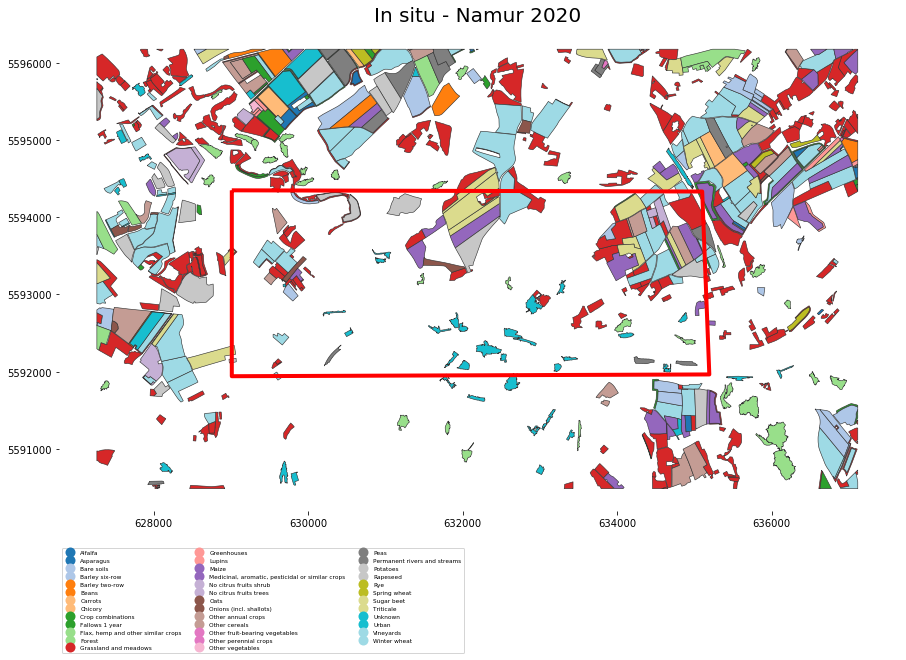

In [92]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

roi_gdf.boundary.plot(color='red',
                      linewidth = 4,
                      ax=ax)

lut_in_situ_gdf.plot(ax=ax,
                     column='sub',
                     categorical=True,
                     cmap='tab20',
                     linewidth=.6,
                     edgecolor='0.2',
                     legend=True,
                     legend_kwds={'loc':'lower left','bbox_to_anchor':(0,-0.3), 'fontsize':'xx-small', 'ncol':3})

ax.set_title('In situ - Namur 2020',fontsize=20)

plt.box(False)

##### 1.5.1 Clip polygons to the ROI extent

In [75]:
clip_lut_in_situ_gdf = gpd.clip(lut_in_situ_gdf, roi_gdf)

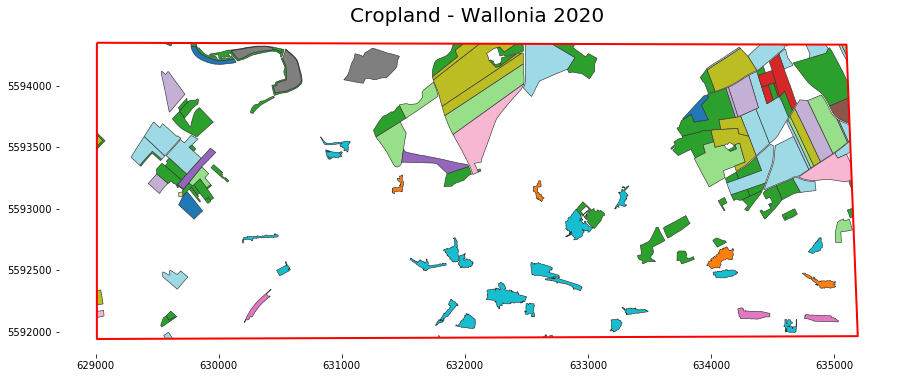

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

roi_gdf.boundary.plot(color='red',
                      linewidth = 2,
                      ax=ax)

clip_lut_in_situ_gdf.plot(ax=ax,
                          column='sub',
                          categorical=True,
                          cmap='tab20',
                          linewidth=.6,
                          edgecolor='0.2',
                          legend=False)

ax.set_title('In situ - Namur 2020 (clip)',fontsize=20)

plt.box(False)

##### 1.5.2 Select polygons within the ROI extent

In [73]:
select_lut_in_situ_gdf = lut_in_situ_gdf[lut_in_situ_gdf.within(roi_gdf.geometry[0])]

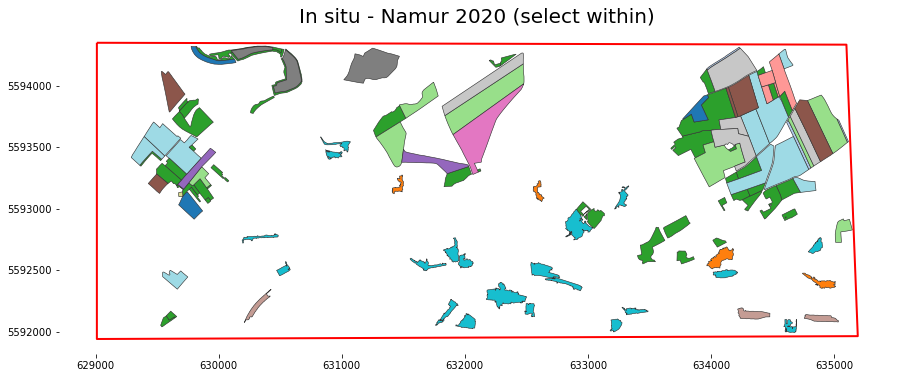

In [89]:
fig, ax = plt.subplots(1, 1, figsize=(15,15))

roi_gdf.boundary.plot(color='red',
                      linewidth = 2,
                      ax=ax)

select_lut_in_situ_gdf.plot(ax=ax,
                            column='sub',
                            categorical=True,
                            cmap='tab20',
                            linewidth=.6,
                            edgecolor='0.2',
                            legend=False)

ax.set_title('In situ - Namur 2020 (select within)',fontsize=20)

plt.box(False)

## Write geodataframe into a shapefile

In [68]:
in_situ_file = f'{in_situ_path}NAMUR_2020_IN_SITU_ROI.shp'

lut_in_situ_gdf.to_file(in_situ_file)

print(f'New shapefile has been created : {in_situ_file}')

New shapefile has been created : /export/miro/ndeffense/LBRAT2104/GROUP_X/WORK/IN_SITU/NAMUR_2020_IN_SITU_ROI.shp
